In [17]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

In [18]:
filename = '..\solardb\AnXin-2020-0505.db'
with sqlite3.connect(filename) as con:
    invdf  = pd.read_sql('''select * from inverter_minutely''', con=con)
    irradf = pd.read_sql('''select * from imeter_minutely''', con=con)
    tempdf = pd.read_sql('''select * from tmeter_minutely''', con=con)

invdf.LoggedDatetime = pd.to_datetime(invdf.LoggedDatetime)
irradf.LoggedDatetime = pd.to_datetime(irradf.LoggedDatetime)
tempdf.LoggedDatetime = pd.to_datetime(tempdf.LoggedDatetime)


In [19]:
invdf.columns

Index(['UniqueID', 'DeviceID', 'LoggedDatetime', 'AlarmCode', 'ErrorCode',
       'DC1Voltage', 'DC2Voltage', 'DC3Voltage', 'DC4Voltage', 'DC1Current',
       'DC2Current', 'DC3Current', 'DC4Current', 'DC1Power', 'DC2Power',
       'DC3Power', 'DC4Power', 'DC1Positive', 'DC1Negative', 'InternalTemp',
       'HeatSinkTemp', 'AC1Voltage', 'AC2Voltage', 'AC3Voltage', 'AC1Current',
       'AC2Current', 'AC3Current', 'ACFrequency', 'ACOutputPower', 'KWH'],
      dtype='object')

In [20]:
irradf.columns

Index(['UniqueID', 'DeviceID', 'LoggedDatetime', 'Value', 'AccValue'], dtype='object')

In [21]:
tempdf.columns

Index(['UniqueID', 'DeviceID', 'LoggedDatetime', 'Value'], dtype='object')

In [22]:
def normalize(data):
    mu = data.mean()
    sigma = data.std()
    z = (data-mu)/sigma
    return z

In [23]:
invdf1 = invdf.query('DeviceID == 1')
invdf2 = invdf.query('DeviceID == 2')
invdf3 = invdf.query('DeviceID == 3')
invdf4 = invdf.query('DeviceID == 4')
invdf5 = invdf.query('DeviceID == 5')
invdf18 = invdf.query('DeviceID == 18')
invdf19 = invdf.query('DeviceID == 19')


In [24]:
power1 = invdf1.ACOutputPower
power2 = invdf2.ACOutputPower
power3 = invdf3.ACOutputPower
power4 = invdf4.ACOutputPower
power5 = invdf5.ACOutputPower
power18 = invdf18.ACOutputPower
power19 = invdf19.ACOutputPower

In [25]:
zpower1 = normalize(power1)
zpower2 = normalize(power2)
zpower3 = normalize(power3)
zpower4 = normalize(power4)
zpower5 = normalize(power5)
zpower18 = normalize(power18)
zpower19 = normalize(power19)

zirra = normalize(irradf.Value)
ztemp = normalize(tempdf.Value)

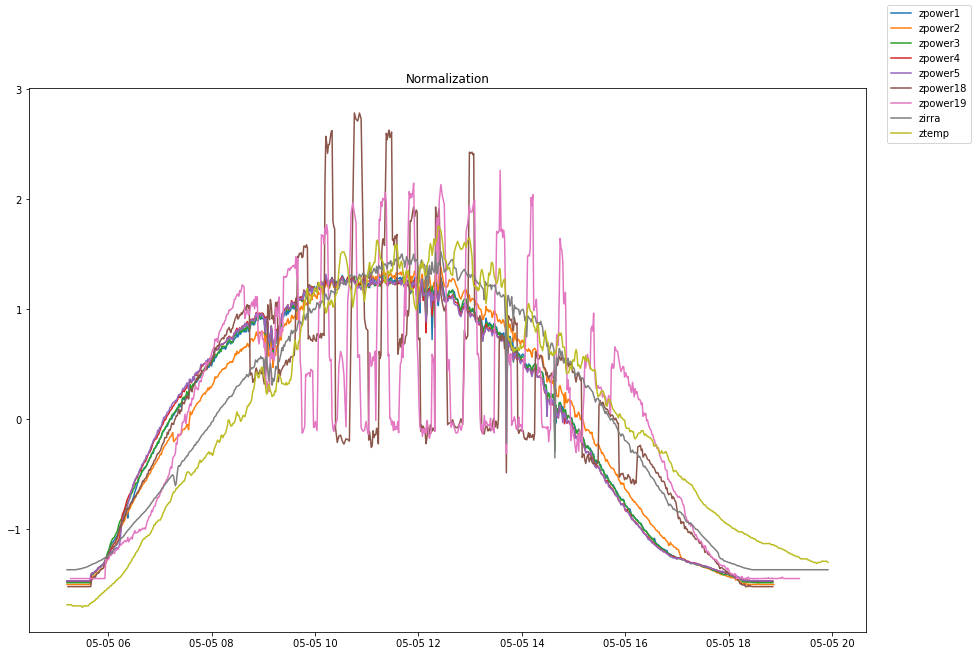

In [26]:
fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(15)

ax.set_title('Normalization')

ax.plot(invdf1.LoggedDatetime, zpower1, label='zpower1')
ax.plot(invdf2.LoggedDatetime, zpower2, label='zpower2')
ax.plot(invdf3.LoggedDatetime, zpower3, label='zpower3')
ax.plot(invdf4.LoggedDatetime, zpower4, label='zpower4')
ax.plot(invdf5.LoggedDatetime, zpower5, label='zpower5')
ax.plot(invdf18.LoggedDatetime, zpower18, label='zpower18')
ax.plot(invdf19.LoggedDatetime, zpower19, label='zpower19')

ax.plot(irradf.LoggedDatetime, zirra, label='zirra')
ax.plot(tempdf.LoggedDatetime, ztemp, label='ztemp')

fig.legend()